# <center>Computational Physics</center>
---

## Week 2: Numerical Integration

In [17]:
import numpy 
import matplotlib.pyplot as plt
%matplotlib inline

Define the function `f`, such that $\textrm{f}(x) \equiv x^{2}\sin(x)$. This is the function that we will be integrating.

In [18]:
def f(x):
    '''Function equivalent to x^2 sin(x).'''
    # YOUR CODE HERE
    return (x ** 2) * numpy.sin(x);


Ensure your function works with numpy arrays:

In [19]:
xs=numpy.arange(0, 1, step=0.1)
assert numpy.isclose(f(xs), 
                     [0., 0.00099833, 0.00794677, 0.02659682, 0.06230693,
                      0.11985638, 0.20327129, 0.31566667, 0.4591079 , 0.6344948 ]).all()

Derive the indefinite integral of $f(x)$ nalytically. Call this function $g(x)$ and implement it below. Set the constant of integration such that $g(0)=0$.

In [20]:
def g(x):
    '''Analytical integral of f(x).'''
    # YOUR CODE HERE
    intergral = -1 * (x ** 2) * numpy.cos(x) + 2 * x * numpy.sin(x) + 2 * numpy.cos(x) -2
    return intergral;

    

Check your solution with the same numpy array:

In [21]:
assert g(0) == 0.

In [22]:
assert numpy.isclose(g(xs), 
                     [0., 0.00002497, 0.00039822, 0.00200482, 0.0062869, 
                      0.01519502, 0.03112138, 0.05681646, 0.09529087, 0.1497043 ]).all()

Now, using the analytically derived indefinite integral, $g(x)$, define a function which calculates the definite integral of $f(x)$ over the interval $(x_{min},~x_{max})$.

In [23]:
def integrate_analytic(xmin, xmax):
    '''Analytical integral of f(x) from xmin to xmax.'''
    # YOUR CODE HERE
    return g(xmax) - g(xmin);


Check your analytic function:

In [24]:
assert numpy.isclose(integrate_analytic(xmin=0, xmax=4), 1.096591)

## Numerical implementation

Create a function which calculates the definite integral of the function $f(x)$ over the interval $(x_{min},~x_{max})$ using Simpson's rule with $N$ panels.

In [25]:
def integrate_numeric(xmin, xmax, N):
    ''' 
    Numerical integral of f from xmin to xmax using Simpson's rule with 
        N panels.
    '''
    # YOUR CODE HERE
    
    width = (xmax - xmin) / N
    def X(a):
        return (xmin + (a - 1) * width);
    def m(b):
        return (X(b) + X(b + 1)) / 2 ;
    sumX = 0
    sumM = 0
    for i in range(1, N + 2):
        sumX += f(X(i))
    for j in range(1, N + 1):
        sumM += f(m(j))
    return (width / 6) * ((2 * sumX) + (4 * sumM) - f(xmin) - f(xmax));

Make sure you have implemented Simpson's rule correctly:

In [26]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=1), 1.6266126)

In [27]:
assert numpy.isclose(integrate_numeric(xmin=0, xmax=4, N=50), 1.096591)

## Plotting task

** Task 1 **

There will always be some discrepancy between a numerically calculated result and an analytically derived result. Produce a log-log plot showing the fractional error between these two results as the number of panels is varied. The plot should have labels and a title.


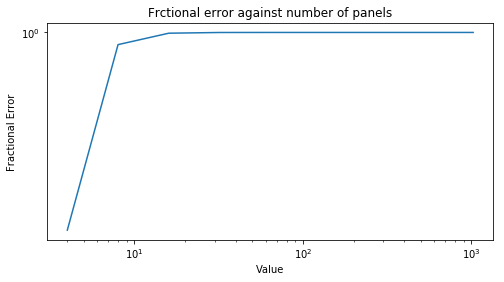

In [28]:
x0, x1 = 0, 2  # Bounds to integrate f(x) over
panel_counts = [4, 8, 16, 32, 64, 128, 256, 512, 1024]  # Panel numbers to use
result_analytic = integrate_analytic(x0, x1)  # Define reference value from analytical solution

def Y(n):
    yaxis = []
    for i in range(1, len(panel_counts) + 1):
        yaxis.append(integrate_numeric(0, 2, panel_counts[i - 1]))
    return yaxis;

plt.figure(figsize=(8, 4))
plt.xlabel("Value")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("Fractional Error")
plt.title("Frctional error against number of panels")
plt.plot(panel_counts , Y(panel_counts) / result_analytic , label="line")  


What effect(s) does changing the number of panels used have
on the accuracy of the numerical method? What happens if the number of panels is taken too large?

In general increasing the number of pannels increases the accuracy of the intergration as aproximations hold better with smaller pannel widths. Taking the pannel number too large will lead to inaccuracy due to rounding errors as the pannel width is very small. 

If the trapezium rule was being used, how would the panel
count affect accuracy? 

Using trapezium rule the error is proportional to 1/(number of pannels)^2, unill the pannel number is very large, and there is an error from rounding due to the small pannel width. The accuracy increases with number of pannels up to a point where rounding errors become significant.